Excellent data science problem: "As obesity increases, how does blood pressure change?"
This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

Predict the price of a house at sale.

SalePrice - the property's sale price in dollars. This is the target variable.

In [1834]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

In [1835]:
# Uploading dataset with Id columns as indexes
df_train = pd.read_csv('./datasets/train.csv',index_col='Id')
df_test = pd.read_csv('./datasets/test.csv',index_col='Id')

In [1836]:
# Looking at train dataframe first 5 rows
df_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [1837]:
# Checking duplicates
len(df_train)-len(df_train.drop_duplicates())
# There is no duplicate rows

0

In [1838]:
# Checking columns names and if there are missing data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

We have 80 columns, 2051 rows. Some columns have missing data, we will explore them closely.
We also see that the names of the columns contain space between words and have capital letters, it is inconvenient to use so we will change it.

In [1839]:
# Creating a function to change the columns' names in lower case without space between words
def column_name(df):
    """
    Take df - dataframe as an argument.
    Change column name to lower case 
    and replace space (' ') to underscore ('_')
    
    Return names of columns
    """
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')
    return df.columns

In [1840]:
# Changing the columns' names in lower case without space between words
column_name(df_train)
column_name(df_test)

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

### Data cleaning

In [1841]:
# Looking at columns with missimg data
columns_with_null = df_train.isnull().sum()
print('Number of columns with missing data:',columns_with_null[columns_with_null >0].count())
columns_with_null[columns_with_null >0]

Number of columns with missing data: 26


lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

There are 26 columns with missing data. Some columns have more than 50% of missing data.

According to the data dictionary and csv file itself, we see that most of the missing values have meaning. Mostly, missing values represent 'no present' of the features in a particular property.

We also can see that some columns such as exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc', 'kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc' have categorical values with explicit order which we can convert this strings into ints.

#### Encoding ordinal columns into ints

Table shows encoding of column rules

<center>

|                        Columns' names                        |                      Categorical values                      |                                       |
| :----------------------------------------------------------: | :----------------------------------------------------------: | :-----------------------------------: |
| 'exter_qual',<br/>'exter_cond',<br/>'bsmt_qual',<br/>'bsmt_cond',<br/>'heating_qc',<br/>'kitchen_qual',<br/>'fireplace_qu',<br/>'garage_qual',<br/>'garage_cond',<br/>'pool_qc' | Excellent<br/>Good<br/>Average/Typical<br/>Fair<br/>Poor<br/>No feature |    5<br/>4<br/>3<br/>2<br/>1<br/>0    |
|                          Utilities                           | AllPub All public Utilities (E,G,W,& S)<br/>NoSewr Electricity, Gas, and Water (Septic Tank)<br/>NoSeWa Electricity and Gas Only<br/>ELO Electricity only |          3<br/>2<br/>1<br/>0          |
|                         BsmtExposure                         | Gd Good Exposure <br/>Av Average Exposure<br/>Mn Mimimum Exposure<br/>No No Exposure<br/>NA No Basement |       4<br/>3<br/>2<br/>1<br/>0       |
|                         BsmtFinType1                         | GLQ Good Living Quarters<br/>ALQ Average Living Quarters<br/>BLQ Below Average Living Quarters<br/>Rec Average Rec Room<br/>LwQ Low Quality<br/>Unf Unfinshed<br/>NA No Basement | 6<br/>5<br/>4<br/>3<br/>2<br/>1<br/>0 |
|                         BsmtFinType2                         |                        NA No Basement                        |                'None'                 |
|                          CentralAir                          |                        N No<br/>Y Yes                        |                0<br/>1                |
|                            Fence                             | GdPrv Good Privacy<br/>MnPrv Minimum Privacy<br/>GdWo Good Wood<br/>MnWw Minimum Wood/Wire<br/>NA No Fence |       4<br/>3<br/>2<br/>1<br/>0       |
|                          GarageType                          |                         NA No Garage                         |                'None'                 |
|                            Alley                             |                      NA No alley access                      |                'None'                 |
|                         MiscFeature                          |                           NA None                            |                'None'                 |

</center>

In [1842]:
# Creating a function to convert ordinal similar data to int (5-0 scale)
def ordinal_to_int(df,columns_list):
    '''
    Take ordinal columns and turn into 5-0 scale
    df - DataFrame,
    columns_list - (list of str) - list of columns' names,
    Scale (or similar):
    Excellent = 5,
    Good = 4,
    Average/Typical = 3,
    Fair = 2,
    Poor = 1,
    No feature (NaN) = 0.
    
    Print number of unique values before and afret convertation 
    '''
    for column in columns_list:
        print(df[column].value_counts())
        if column not in ['bsmtfin_type_2','alley','garage_type','garage_yr_blt',
                          'garage_finish','misc_feature']:
            df[column] = df[column].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,
                                        'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0,
                                        'Gd':4,'Av':3,'Mn':2,'No':1,
                                        'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,
                                        'LwQ':2,'Unf':1,'Y':1,'N':0,
                                        'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,
                                        np.nan:0})
        else:
            df[column] = df[column].map(lambda x: 'None' if x != x else x)
        print(df[column].value_counts())
        print('-----------------------')

In [1843]:
# Converting similar ordinal categorical data into 5-0 scale 
# Checking converted values
list_of_columns = ['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc',
                   'kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc']
ordinal_to_int(df_train,list_of_columns)
ordinal_to_int(df_test,list_of_columns)

TA    1247
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64
3    1247
4     697
5      81
2      26
Name: exter_qual, dtype: int64
-----------------------
TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64
3    1778
4     215
2      49
5       7
1       2
Name: exter_cond, dtype: int64
-----------------------
TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64
3    887
4    864
5    184
2     60
0     55
1      1
Name: bsmt_qual, dtype: int64
-----------------------
TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64
3    1834
4      89
2      65
0      55
1       5
5       3
Name: bsmt_cond, dtype: int64
-----------------------
Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64
5    1065
3     597
4     319
2      67
1       3
Name: heating_qc, dtype: int64
-----------------------
TA    1047
Gd     806
Ex     151
Fa      47
Name: kitchen_qua

In [1844]:
# Converting other categorical columns which do not have follow the rule above
# Checking converted values
list_of_columns = ['utilities','bsmt_exposure','bsmtfin_type_1','central_air','fence',
                   'bsmtfin_type_2','garage_type','garage_yr_blt','garage_finish','alley','misc_feature']
ordinal_to_int(df_train,list_of_columns)
ordinal_to_int(df_test,list_of_columns)

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64
3    2049
1       1
2       1
Name: utilities, dtype: int64
-----------------------
No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64
1    1339
3     288
4     203
2     163
0      58
Name: bsmt_exposure, dtype: int64
-----------------------
GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64
6    615
1    603
5    293
4    200
3    183
2    102
0     55
Name: bsmtfin_type_1, dtype: int64
-----------------------
Y    1910
N     141
Name: central_air, dtype: int64
1    1910
0     141
Name: central_air, dtype: int64
-----------------------
MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64
0    1651
3     227
4      83
2      80
1      10
Name: fence, dtype: int64
-----------------------
Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64
Unf     1749
Rec   

As we can see all columns converted without problems. All NaN were converted into meaningfull values.

Nonetheless, according to the csv file some columns have real missing data:

- bsmtExposure: missing values id: 1342, 1797, 67, 2780 have no info
- bsmtFinType1: missing values id: 1342
- bsmtfin_type_2: missing values id: 445, 1342
- id 2237 has garage but don't have any info about it

In [1845]:
# Here are only 8 rows with high number of missing values or unique missing values
# Romoving rows with id = 1342,1555,2237,1797,67,2780,445 due to high number of missing values
df_train.drop([1342,1498,1555,2237,1797,67,2780,445],inplace=True)

In [1846]:
# Looking again at columns with missimg data
columns_with_null = df_train.isnull().sum()
print('Number of columns with missing data:',columns_with_null[columns_with_null >0].count())
columns_with_null[columns_with_null >0]

Number of columns with missing data: 3


lot_frontage    330
mas_vnr_type     22
mas_vnr_area     22
dtype: int64

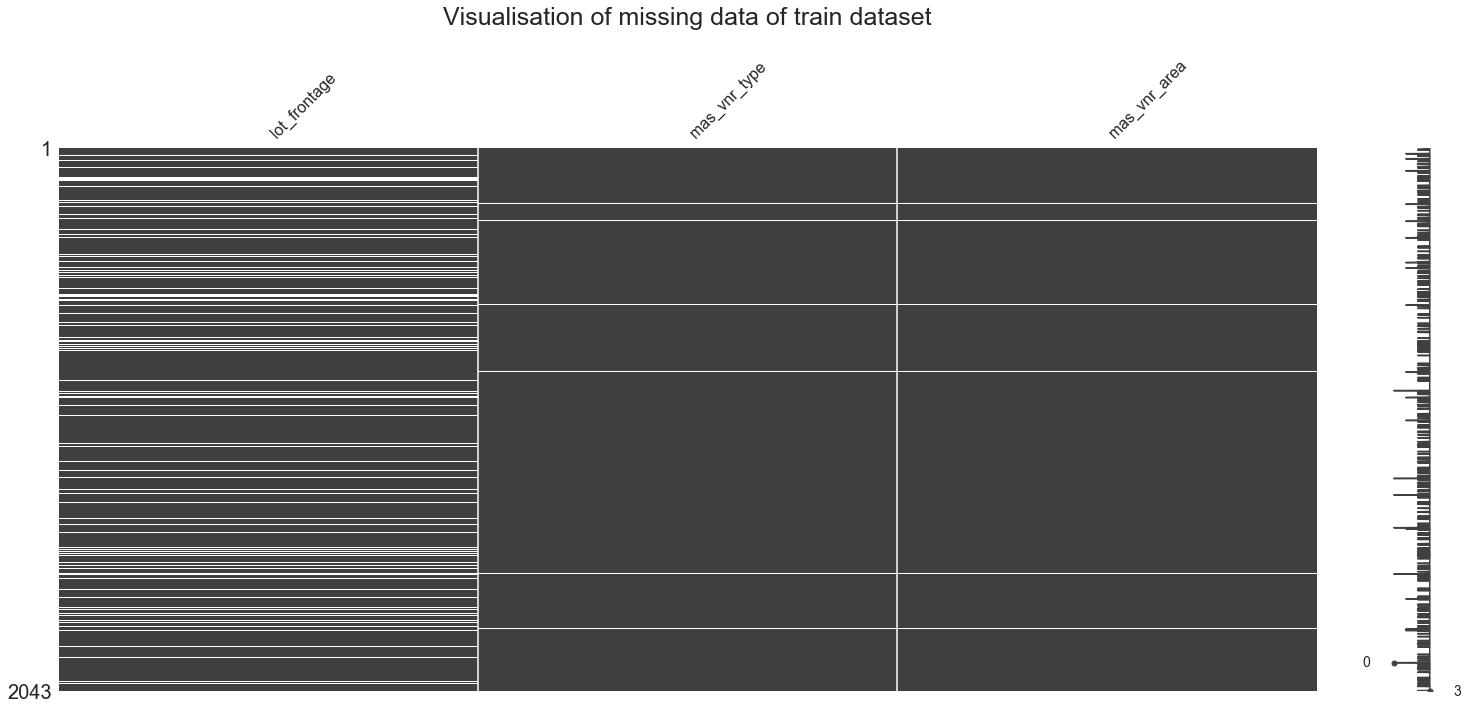

In [1847]:
# Visualisation of missing data of train dataset
import missingno as msno
msno.matrix(df_train[df_train.columns[df_train.isnull().sum() > 0]])
plt.title('Visualisation of missing data of train dataset\n',fontsize=25);

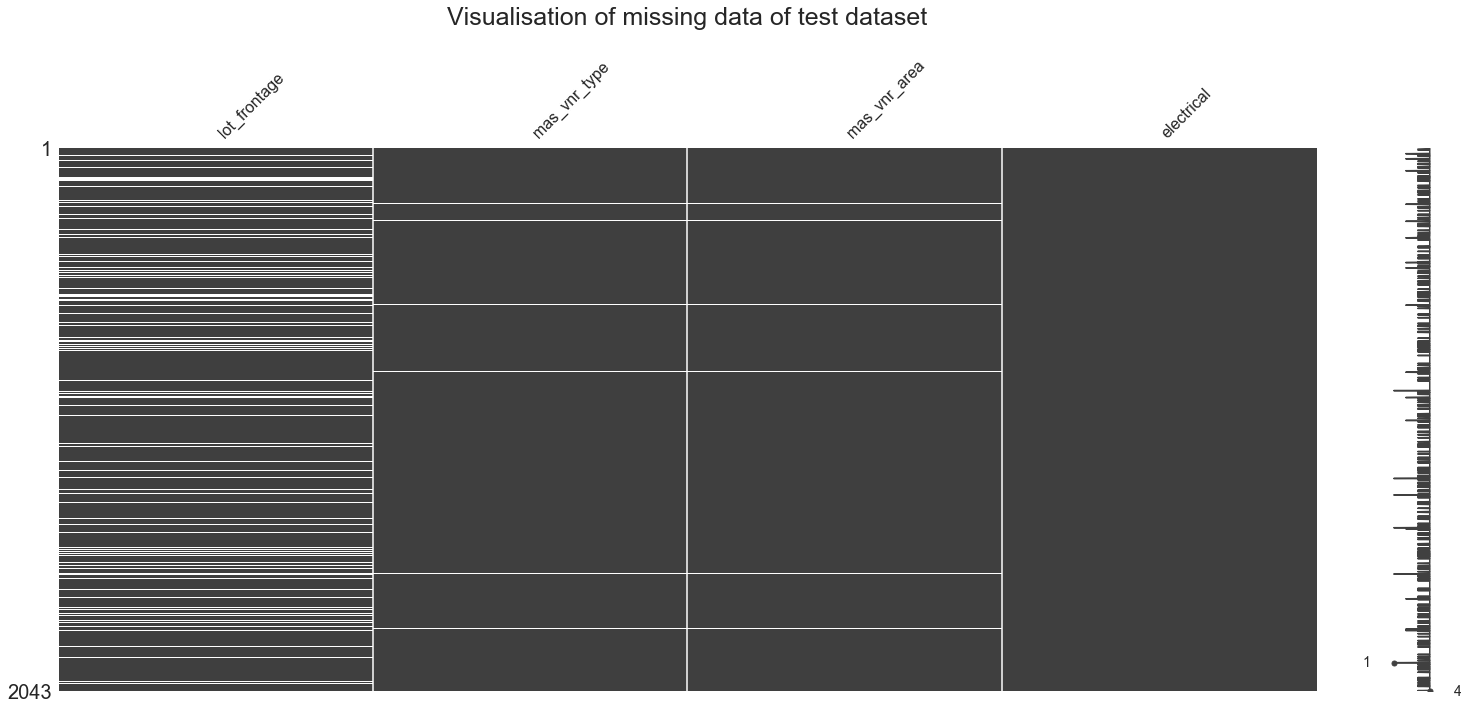

In [1848]:
# Visualisation of missing data of test dataset
import missingno as msno
msno.matrix(df_train[df_test.columns[df_test.isnull().sum() > 0]])
plt.title('Visualisation of missing data of test dataset\n',fontsize=25);

It is clear that lot_frontage still have a lot of missing data (much more than 5%).
Columns mas_vnr_type and mas_vnr_area have only few.

Test dataset has one missing value in 'electrical' column

mas_vnr_type/mas_vnr_area columns

In [1849]:
# Looking for moderate and strong correlations with 'mas_vnr_area' 
corr_area = df_train.corr()['mas_vnr_area']
corr_area[(corr_area >0.3) | (corr_area <-0.3)].sort_values(ascending=False)

mas_vnr_area     1.000000
saleprice        0.512317
overall_qual     0.437377
total_bsmt_sf    0.407790
1st_flr_sf       0.396695
gr_liv_area      0.391316
garage_area      0.383966
exter_qual       0.375789
garage_cars      0.360256
kitchen_qual     0.333188
year_built       0.328924
bsmtfin_sf_1     0.321497
bsmt_qual        0.314185
fireplace_qu     0.303187
Name: mas_vnr_area, dtype: float64

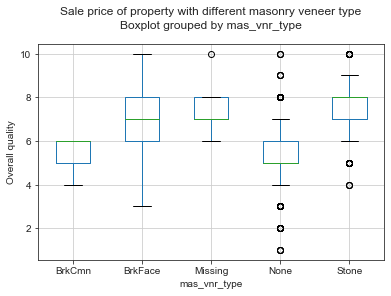

In [1850]:
# Creating boxplot to see which type of veneer close to missing data by overall_qual
df_train['mas_vnr_type'].fillna(value='Missing',inplace=True)
df_train.boxplot(column='overall_qual',by='mas_vnr_type')
plt.title('Sale price of property with different masonry veneer type\n\n')
plt.ylabel('Overall quality');
# We can see that BrkFace and Stone is much close than None

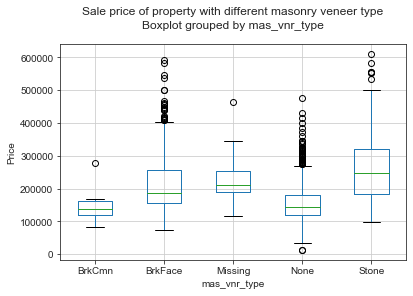

In [1851]:
# Medians of Masonry veneer type differ with change in price of property (train dataset)
df_train.boxplot(column='saleprice',by='mas_vnr_type')
plt.title('Sale price of property with different masonry veneer type\n\n')
plt.ylabel('Price');
# The sale price of missing data is much close to BrkFace than None

The decision is to keep the columns mas_vnr_type and fill 22 missing values for train dataset and 1 missing value fo test dataset with 'BrkFace' and fill mas_vnr_area with the average value from 'BrkFace'.

In [1852]:
df_train.groupby('mas_vnr_type')['mas_vnr_area'].mean()

mas_vnr_type
BrkCmn     194.000000
BrkFace    254.786284
Missing           NaN
None         0.523495
Stone      230.410714
Name: mas_vnr_area, dtype: float64

In [1853]:
df_train.loc[df_train['mas_vnr_type']=='Missing','mas_vnr_area'] = 255.0
df_test['mas_vnr_type'].fillna(value='BrkFace',inplace=True)
df_train.loc[df_train['mas_vnr_type']=='Missing','mas_vnr_area'] = 255.0
df_test['mas_vnr_area'].fillna(value=255.0,inplace=True)

5 rows in train dataset and 2 in test dataset were identified without Masonry veneer but the area is greater than 0 that is impossible.

In [1854]:
# train dataset
df_train[(df_train['mas_vnr_type'] == 'None')&(df_train['mas_vnr_area'] >0)][['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area
Id,,
1862,None,1.0
2529,None,288.0
1914,None,1.0
2004,None,1.0
364,None,344.0


In [1855]:
# test dataset
df_test[(df_test['mas_vnr_type'] == 'None')&(df_test['mas_vnr_area'] >0)][['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area
Id,,
442,None,285.0
404,None,312.0


In [1856]:
# All rows with values greater than 1 are counted as typos and fill with 0
df_train.loc[((df_train['mas_vnr_type'] == 'None')&(df_train['mas_vnr_area'] ==1)),'mas_vnr_area'] = 0

In [1857]:
# we can see that BrkFace is the most popular veneer type
df_test.groupby('mas_vnr_type')['mas_vnr_area'].sum()

mas_vnr_type
BrkCmn      2365.0
BrkFace    70087.0
CBlock       198.0
None         597.0
Stone      20939.0
Name: mas_vnr_area, dtype: float64

In [1858]:
# All remaining rows with values greater than 0 are counted as the most popular values type - BarkFace
df_train.loc[((df_train['mas_vnr_type'] == 'None')&(df_train['mas_vnr_area'] >0)),
             'mas_vnr_type'] = 'BrkFace'
df_test.loc[((df_test['mas_vnr_type'] == 'None')&(df_test['mas_vnr_area'] >0)),
            'mas_vnr_type'] = 'BrkFace'

In [1859]:
print('train mas_vnr_type,area Nan:',((df_train['mas_vnr_type'] == 'None')&(df_train['mas_vnr_area'] >0)).sum())
print('test mas_vnr_type,area Nan:',((df_test['mas_vnr_type'] == 'None')&(df_test['mas_vnr_area'] >0)).sum())

train mas_vnr_type,area Nan: 0
test mas_vnr_type,area Nan: 0


Neighborhood column

In [1860]:
# The number of neighbourhoods in train data is 28 but in teas data only 26
# We should take it into account later on if we will use this column for 
a = {i for i in df_train['neighborhood'].value_counts().index}
b = {i for i in df_test['neighborhood'].value_counts().index}
print(f'Neighborhoods which present in train but absent in test dataset {a-b}')

Neighborhoods which present in train but absent in test dataset {'Landmrk', 'GrnHill'}


lot_frontage column

In [1861]:
corr_area = df_train.corr()['lot_frontage']
corr_area[(corr_area >0.3) | (corr_area <-0.3)].sort_values(ascending=False)

lot_frontage     1.000000
lot_area         0.575445
1st_flr_sf       0.462535
gr_liv_area      0.382226
totrms_abvgrd    0.361548
total_bsmt_sf    0.361491
garage_area      0.358672
saleprice        0.341482
ms_subclass     -0.388705
Name: lot_frontage, dtype: float64

We can see that lot_frontage feature has moderate correlation with saleprice (0.341842) and higher correlation with lot_area feature. To avoid multicolinearity I decided to drop this column.

In [1862]:
df_train.drop(columns='lot_frontage',inplace=True)
df_test.drop(columns='lot_frontage',inplace=True)

In [1863]:
df_train.isnull().sum().sum()
# train dataset has no more missing data

0

In [1864]:
df_test.isnull().sum().sum()
# electrical column left, it will be considered in case of choosing this feature for predictions

1

Checking data type

In [1865]:
# Checking numerical data type for train dataset
numeric_columns = df_train.select_dtypes(include=np.number)
numeric_columns.iloc[:5,:15]
numeric_columns.iloc[:5,15:30]
numeric_columns.iloc[:5,30:]

,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,1,4,6,0,0,2.0,475.0,3,3,0,...,0,0,0,0,0,0,0,3,2010,130500
544,1,4,8,1,3,2.0,559.0,3,3,0,...,0,0,0,0,0,0,0,4,2009,220000
153,1,4,5,0,0,1.0,246.0,3,3,0,...,0,0,0,0,0,0,0,1,2010,109000
318,1,3,7,0,0,2.0,400.0,3,3,100,...,0,0,0,0,0,0,0,4,2010,174000
255,1,3,6,0,0,2.0,484.0,3,3,0,...,0,0,0,0,0,0,0,3,2010,138500


In [1866]:
# Checking categorical data type for train dataset
categorical_columns = df_train.select_dtypes(include='object')
categorical_columns.iloc[:5,:15]
categorical_columns.iloc[:5,15:]
# Data types correspond the values except 'garage_yr_blt'

,exterior_2nd,mas_vnr_type,foundation,bsmtfin_type_2,heating,electrical,functional,garage_type,garage_yr_blt,garage_finish,paved_drive,misc_feature,sale_type
Id,,,,,,,,,,,,,
109,Plywood,BrkFace,CBlock,Unf,GasA,SBrkr,Typ,Attchd,1976,RFn,Y,None,WD
544,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,Attchd,1997,RFn,Y,None,WD
153,VinylSd,None,CBlock,Unf,GasA,SBrkr,Typ,Detchd,1953,Unf,Y,None,WD
318,VinylSd,None,PConc,Unf,GasA,SBrkr,Typ,BuiltIn,2007,Fin,Y,None,WD
255,Plywood,None,PConc,Unf,GasA,SBrkr,Typ,Detchd,1957,Unf,N,None,WD


In [1867]:
# Changing 'garage_yr_blt' data type to int, 'None' value replacing with a mean year
df_train['garage_yr_blt'].unique()
years = [int(year) for year in df_train['garage_yr_blt'].values if year != 'None']
mean = sum(years)/len(years)
df_train['garage_yr_blt'] = df_train['garage_yr_blt'].map(lambda year: int(year)
                                                        if isinstance(year,float) else mean)
sorted(df_train['garage_yr_blt'].unique())[-4:]
# there is a value 2207 which can not be the true value, it is counted as typo and change to 2007
df_train.loc[df_train['garage_yr_blt'] == 2207,'garage_yr_blt'] = 2007
df_train['garage_yr_blt'].dtypes

dtype('float64')

In [1868]:
# Checking numerical data type for test dataset
numeric_columns = df_test.select_dtypes(include=np.number)
numeric_columns.iloc[:5,:15]
numeric_columns.iloc[:5,15:30]
numeric_columns.iloc[:5,30:]

,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold
Id,,,,,,,,,,,,,,,,,,,,
2658,2,2,9,0,0,1,440,1,1,0,60,112,0,0,0,0,0,0,4,2006
2718,2,3,10,0,0,2,580,3,3,170,0,0,0,0,0,0,0,0,8,2006
2414,1,4,7,1,4,2,426,3,3,100,24,0,0,0,0,0,0,0,9,2006
1989,1,3,5,0,0,2,480,2,3,0,0,184,0,0,0,0,0,0,7,2007
625,1,3,6,2,4,2,514,3,3,0,76,0,0,185,0,0,0,0,7,2009


In [1869]:
# Checking categorical data type for test dataset
categorical_columns = df_test.select_dtypes(include='object')
categorical_columns.iloc[:5,:15]
categorical_columns.iloc[:5,15:]
# Same issue here with 'garage_yr_blt' data type

,exterior_2nd,mas_vnr_type,foundation,bsmtfin_type_2,heating,electrical,functional,garage_type,garage_yr_blt,garage_finish,paved_drive,misc_feature,sale_type
Id,,,,,,,,,,,,,
2658,AsbShng,None,Stone,Unf,GasA,FuseP,Typ,Detchd,1910,Unf,Y,None,WD
2718,Plywood,None,CBlock,Unf,GasA,SBrkr,Typ,Attchd,1977,Fin,Y,None,WD
2414,VinylSd,None,PConc,Unf,GasA,SBrkr,Typ,Attchd,2006,RFn,Y,None,New
1989,Wd Sdng,None,CBlock,Unf,GasA,SBrkr,Typ,Detchd,1935,Unf,N,None,WD
625,Plywood,BrkFace,CBlock,Unf,GasA,SBrkr,Typ,Attchd,1963,RFn,Y,None,WD


In [1870]:
# Changing 'garage_yr_blt' data type to int, 'None' value replacing with a mean year
df_test['garage_yr_blt'].unique()
years = [int(year) for year in df_test['garage_yr_blt'].values if year != 'None']
mean = sum(years)/len(years)
df_test['garage_yr_blt'] = df_test['garage_yr_blt'].map(lambda year: int(year)
                                                        if isinstance(year,float) else mean)
df_test['garage_yr_blt'].dtypes

dtype('float64')

Now we can save clean datasets as csv

In [1871]:
# Saving train and test data into csv files
df_train.to_csv('./datasets/train_clean.csv')
df_test.to_csv('./datasets/test_clean.csv')

### Exploratory Data Analysis

Summary statistics of train dataset

In [1872]:
# Looking at the statistics of numerical features
stats = df_train.describe().T
stats.rename(columns={'50%':'median'},inplace=True)
numeric_columns = df_train.select_dtypes(include=np.number)
stats['99%'] = np.percentile(numeric_columns,99,axis=0)
stats[['count', 'mean', 'median', 'std', 'min', 'max', '99%','25%','75%']].round(1)

,count,mean,median,std,min,max,99%,25%,75%
pid,2043.0,713386282.7,535453160.0,188682547.2,526301100.0,924152030.0,923252091.6,528458155.0,907175555.0
ms_subclass,2043.0,57.1,50.0,42.9,20.0,190.0,190.0,20.0,70.0
lot_area,2043.0,10050.1,9430.0,6703.9,1300.0,159000.0,32581.9,7500.0,11513.5
utilities,2043.0,3.0,3.0,0.0,1.0,3.0,3.0,3.0,3.0
overall_qual,2043.0,6.1,6.0,1.4,1.0,10.0,10.0,5.0,7.0
overall_cond,2043.0,5.6,5.0,1.1,1.0,9.0,9.0,5.0,6.0
year_built,2043.0,1971.7,1974.0,30.1,1872.0,2010.0,2008.0,1954.0,2001.0
year_remod/add,2043.0,1984.2,1993.0,21.0,1950.0,2010.0,2009.0,1964.5,2004.0
mas_vnr_area,2043.0,101.4,0.0,174.9,0.0,1600.0,755.0,0.0,167.5
exter_qual,2043.0,3.4,3.0,0.6,2.0,5.0,5.0,3.0,4.0


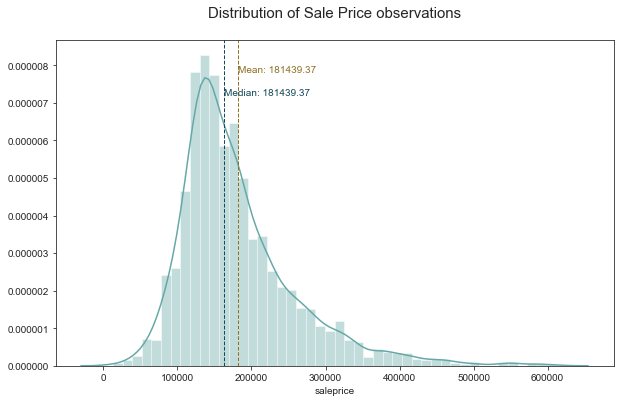

In [1873]:
# Visualizing distribution of target variable (Sale price)
fig = plt.figure(figsize=(10,6))
sns.distplot(df_train['saleprice'],color='#65a8a7')
# creating mean and median lines and labels
plt.axvline(df_train['saleprice'].mean(), c='#8f7125', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df_train['saleprice'].mean(), max_ylim*0.9, 
         'Mean: {:.2f}'.format(df_train['saleprice'].mean()),color='#8f7125')
plt.axvline(df_train['saleprice'].median(), c='#144957', linestyle='dashed', linewidth=1)
plt.text(df_train['saleprice'].median(), max_ylim*0.83, 
         'Median: {:.2f}'.format(df_train['saleprice'].mean()),color='#144957')
plt.title('Distribution of Sale Price observations\n',fontsize=15);

From the statistics above it can be seen that all columns do not have any missing values and remained rows are 2043. Minimum and maximum values of all columns are normal.

Mean and median of the target variable (sale price) differ, the distribution is a bit skewed towards the right due to some number of outliers.

Outliers should be explored next.

In [1874]:
# Creating function for looking for outliers
def find_outliers(df,stats,columns):
    '''
    Parameters:
    df - DataFrame
    stats - information from .describe() function: mean, 99 percentile
    columns - (list of str) - list with columns' names
    
    Calculates outliers based in 3 sigma-rule
    
    Returns:
    DataFrame with value if anomalies else NaN
    '''
    outliers = {}
    for column in columns:
        upper_level = stats.loc[column,'mean'] + 3*stats.loc[column,'std']
        level_99 = stats.loc[column,'99%']
        outlier_col = df[(df[column] >= upper_level)^(df[column] >= level_99)][column]
        outliers[column] = outlier_col
    return pd.DataFrame(outliers)

Inspection of numerical or categorical columns represented by numbers.

In [1875]:
# Lookinf for outliers for each column
outliers_df = find_outliers(numeric_columns,stats,numeric_columns.columns)
print(f'Columns with outliers {len(outliers[outliers >0])} out of {len(df_train.columns)}')
print('Column  |  Number of outliers')
outliers = outliers_df.notnull().sum()
outliers

Columns with outliers 47 out of 79
Column  |  Number of outliers


pid                  21
ms_subclass           0
lot_area              3
utilities          2041
overall_qual         23
overall_cond          0
year_built           51
year_remod/add       31
mas_vnr_area         25
exter_qual           81
exter_cond          215
bsmt_qual           184
bsmt_cond            89
bsmt_exposure       203
bsmtfin_type_1      614
bsmtfin_sf_1         12
bsmtfin_sf_2         45
bsmt_unf_sf          10
total_bsmt_sf         8
heating_qc         1059
central_air        1903
1st_flr_sf            3
2nd_flr_sf           14
low_qual_fin_sf       2
gr_liv_area           6
bsmt_full_bath        0
bsmt_half_bath        0
full_bath            43
half_bath           723
bedroom_abvgr        40
kitchen_abvgr         0
kitchen_qual        150
totrms_abvgrd        21
fireplaces          145
fireplace_qu         31
garage_yr_blt        63
garage_cars         274
garage_area           9
garage_qual          18
garage_cond        1873
wood_deck_sf          8
open_porch_sf   

52 out of 79 columns have at least one outlier value. We will consider rach column by looking at number of each unique value per variable.

In [1876]:
# Creating a function to see the number of unique values in column
def unique_value_count(df,columns_list,limit=0.7):
    '''
    Parameters:
    df - DataFrame
    columns_list - (list of str) - list with columns' names
    limit - (int) - threashold of filter of relative frequencies of the unique values.
    
    Prints number of unique categories for columns where relative frequencies 
    of the unique values is higher than the limit (in percentages).
    
    Returns:
    not_ok_distr = list of columns where relative frequencies of the unique values are HIGHER than a limit.
    ok_distr = list of columns where relative frequencies of the unique values are LESS than a limit.
    '''
    count_columns = 0
    count_unequal = 0
    not_ok_distr = []
    ok_distr = []
    for column in columns_list:
        count_columns +=1
        categories = df[column].value_counts(normalize=True)
        if categories.values.max() > 0.7:
            not_ok_distr.append(column)
            count_unequal+=1
            print(categories)
            print('-------------------------')
        else:
            ok_distr.append(column)
    print(f'{count_unequal} from {count_columns} unequally distributed columns')
    return not_ok_distr, ok_distr

In [1877]:
# Inspecting columns with a big number of outliers
not_ok_distr, ok_distr = unique_value_count(df_train,outliers.index)

3    0.999021
2    0.000489
1    0.000489
Name: utilities, dtype: float64
-------------------------
3    0.866373
4    0.105237
2    0.023984
5    0.003426
1    0.000979
Name: exter_cond, dtype: float64
-------------------------
3    0.895252
4    0.043563
2    0.031326
0    0.025942
1    0.002447
5    0.001468
Name: bsmt_cond, dtype: float64
-------------------------
0.0      0.879589
294.0    0.002447
162.0    0.001468
483.0    0.001468
180.0    0.001468
           ...   
174.0    0.000489
154.0    0.000489
278.0    0.000489
230.0    0.000489
522.0    0.000489
Name: bsmtfin_sf_2, Length: 204, dtype: float64
-------------------------
1    0.931473
0    0.068527
Name: central_air, dtype: float64
-------------------------
0       0.983847
80      0.001468
205     0.000979
362     0.000489
53      0.000489
108     0.000489
114     0.000489
120     0.000489
140     0.000489
144     0.000489
156     0.000489
234     0.000489
259     0.000489
312     0.000489
360     0.000489
1064    0.0004

The printed columns below demonstrate numbers of unique categories for columns where relative frequencies of the unique values are higher than 70% of entire values.

Most of these columns (17 from 52) are distributed very unequally. These 17 columns could be helpful for study anomalies by themself but for our purpose, it is better to drop them in both train and test datasets.

In [1878]:
# Dropping 17 columns with high numbers of outliers and distributed highly unequally
df_train.drop(columns=not_ok_distr,inplace=True)
df_test.drop(columns=not_ok_distr,inplace=True)

Remained columns are inspected further with boxplots.

In [1879]:
# Creating a function for boxplots
def subplot_boxplot(dataframe, list_of_list_columns,maintitle,figsize=(10,10)):
    """
    Plots a boxplot of the column which in list. 
    
    Parameters:
    dataframe
    list_of_list_columns - nested list with lists with pairs of columns as x and y axis.
    maintitle - (str) - main title for all scatterplots
    figsize - the custom size of a figure, 10x10 by default.
    
    Returns:
    Boxplot plot.
    """
    nrows = int(np.ceil(len(list_of_list_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_list_columns):
        sns.boxplot(dataframe[column],ax=ax[i],color='#65a8a7')
        ax[i].set_title(f'Boxplot of {column}\n', fontsize=20)
    #deleting empty subplot if list_of_list_columns is odd
    if len(list_of_list_columns)%2 !=0:
        fig.delaxes(ax[len(list_of_list_columns)]) 
    plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
    plt.suptitle(maintitle,fontsize=25)
    fig.subplots_adjust(top=0.95)
    plt.show()

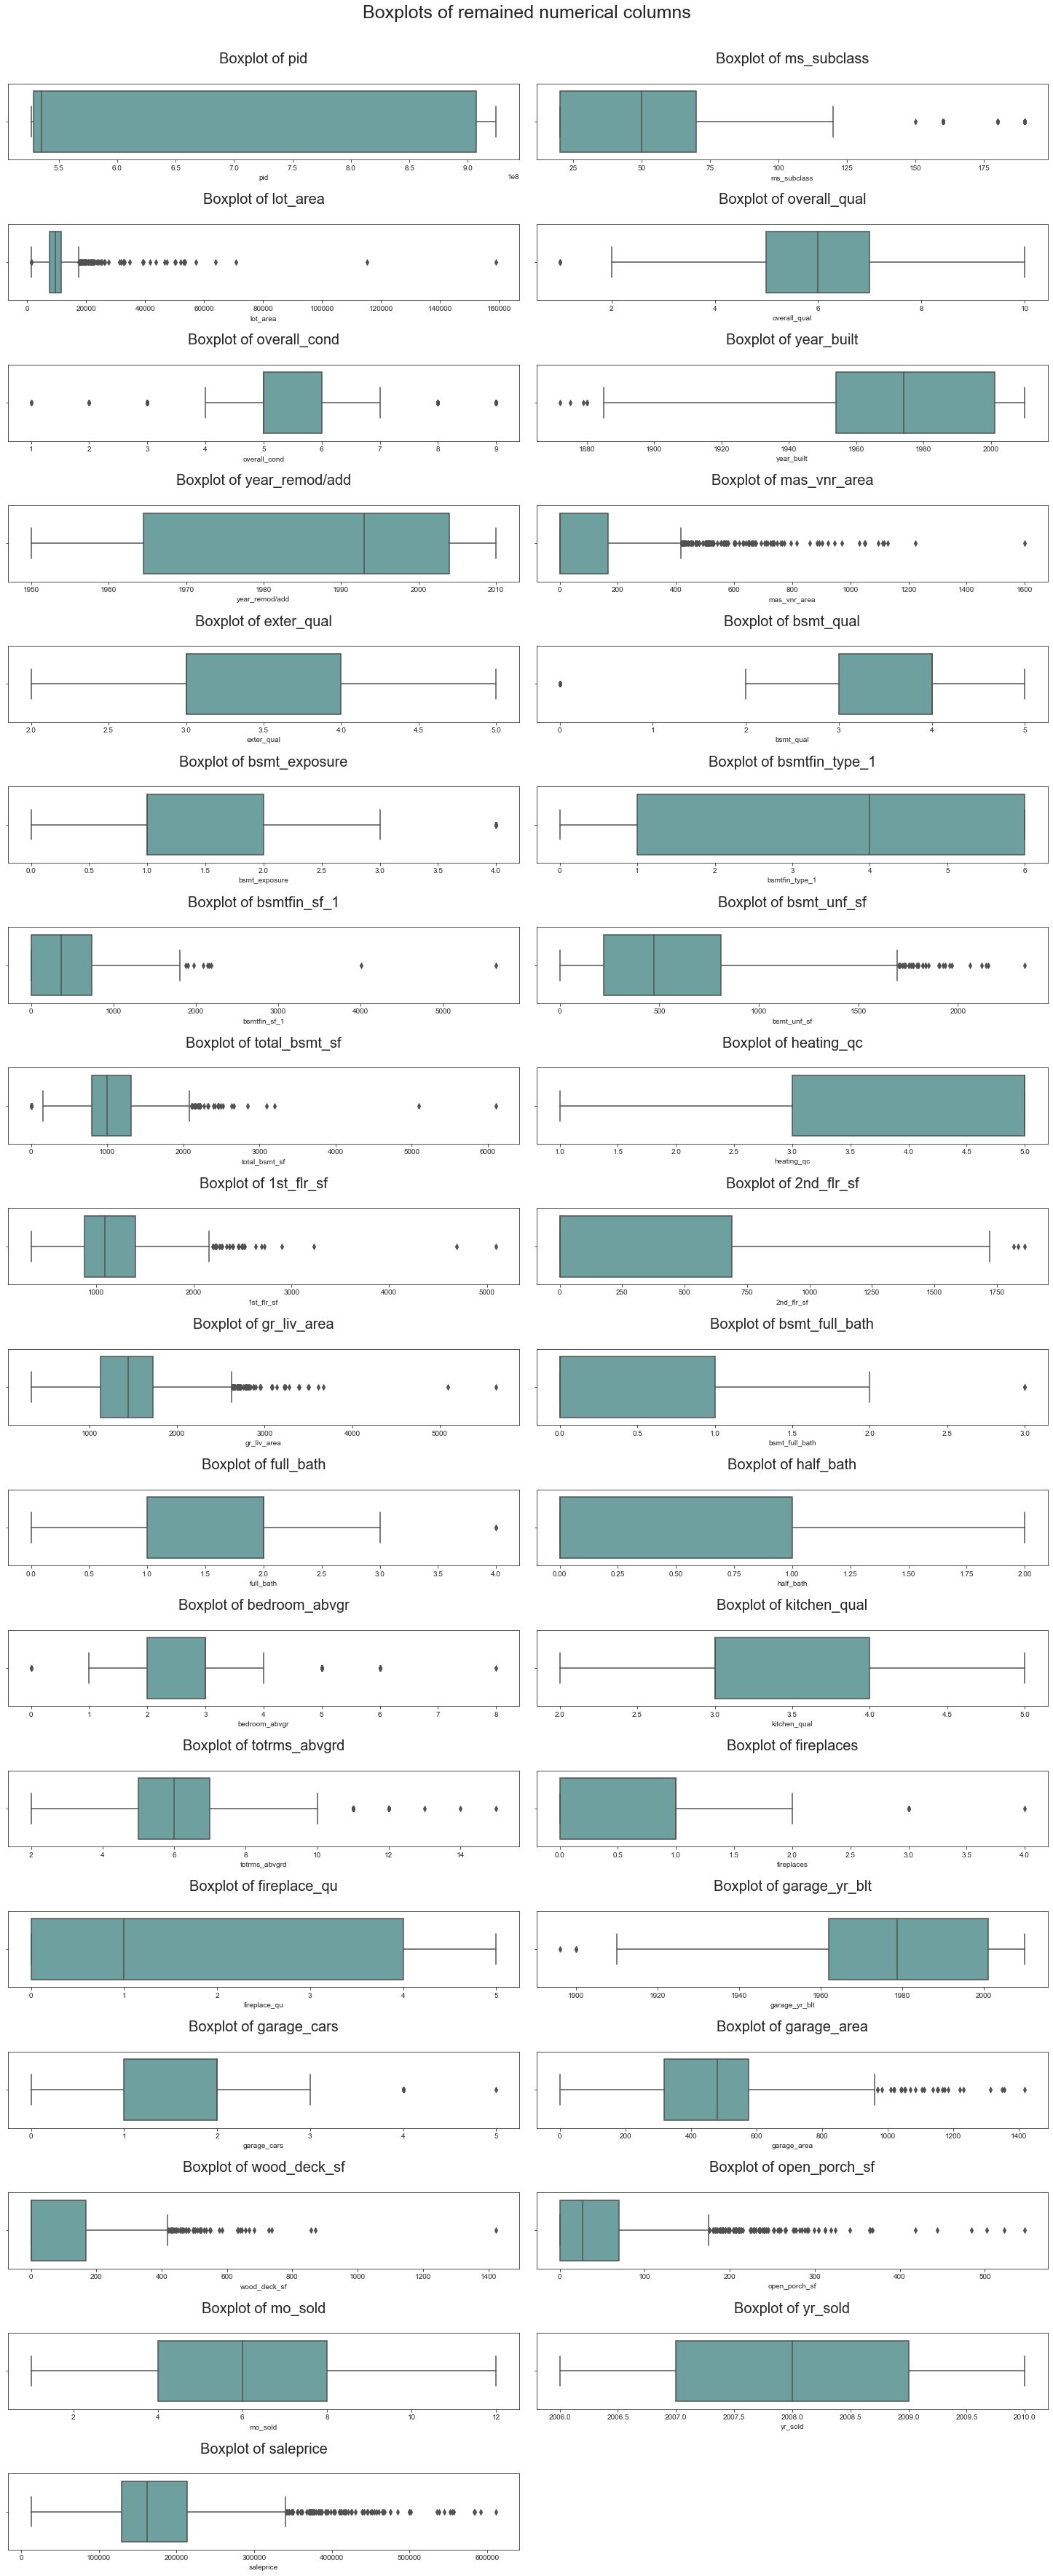

In [1880]:
subplot_boxplot(df_train,ok_distr,figsize=(20,50),
               maintitle='Boxplots of remained numerical columns')

We can divide all columns into 3 categories.

- Almost nurmal distributed: 

   > 'pid', 'year_remod/add', 'exter_qual', 'bsmtfin_type_1', 'heating_qc', 'half_bath', 'kitchen_qual', 'fireplace_qu', 'mo_sold', 'yr_sold', 'garage_yr_blt'.

- Skewed distribution with some outliers: 

   > 'ms_subclass','overall_qual','overall_cond','year_built', 'bsmt_qual', 'bsmt_exposure', 'bsmt_unf_sf', '2nd_flr_sf', 'bsmt_full_bath', 'full_bath', 'bedroom_abvgr', 'totrms_abvgrd', 'fireplaces',  'garage_area','garage_cars', 'saleprice'.

- Very skewed distribution with many outliers: 

  > 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'wood_deck_sf', 'open_porch_sf'.

- Columns with unique anomalies which are far from other points: 

  > 'lot_area' (2, right), 'mas_vnr_area' (1, right), 'bsmtfin_sf_1' (2, right), 'total_bsmt_sf' (2, right), '1st_flr_sf' (2, right), 'gr_liv_area' (2, right), 'bedroom_abvgr' (1, right), 'fireplaces' (1, right), 'wood_deck_sf' (1, right).
  
  Let's explore the last category

In [1881]:
# Printing anomalies
# Creating list with indices of rows with anomalies
indices = []
col_list = ['lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', 
'gr_liv_area', 'bedroom_abvgr', 'fireplaces', 'wood_deck_sf']
for column in col_list:
    if column in ['mas_vnr_area','bedroom_abvgr','fireplaces','wood_deck_sf','gr_liv_area'] :
        numb = 1
    else:
        numb = 2
    print(df_train.nlargest(numb+2,[column])[column])
    indices.append(df_train.nlargest(numb,[column]).index)
list_index = [i[0] for i in indices]+ [i[1] for i in indices if len(i)>1]
anomalies_id = sorted(list(set(list_index)))
anomalies_id

Id
2116    159000
2072    115149
2767     70761
1499     63887
Name: lot_area, dtype: int64
Id
1850    1600.0
2181    1224.0
1844    1129.0
Name: mas_vnr_area, dtype: float64
Id
1499    5644.0
2181    4010.0
45      2188.0
514     2158.0
Name: bsmtfin_sf_1, dtype: float64
Id
1499    6110.0
2181    5095.0
1773    3200.0
424     3094.0
Name: total_bsmt_sf, dtype: float64
Id
2181    5095
1499    4692
1773    3228
1573    2898
Name: 1st_flr_sf, dtype: int64
Id
1499    5642
2181    5095
2738    3672
Name: gr_liv_area, dtype: int64
Id
2195    8
670     6
900     6
Name: bedroom_abvgr, dtype: int64
Id
2499    4
1499    3
786     3
Name: fireplaces, dtype: int64
Id
2294    1424
2451     870
2523     857
Name: wood_deck_sf, dtype: int64


[1499, 1850, 2072, 2116, 2181, 2195, 2294, 2499]

It can be seen that these values are indeed anomalies. The decidion is to create a new df without anomalies and compare dataframes with and without anomalies by looking at scatterplots.

In [1882]:
# Dropping the rows with anomalies
indices = df_train.loc[outliers_id,['lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 
                          '1st_flr_sf', 'gr_liv_area', 'bedroom_abvgr', 'fireplaces', 
                          'wood_deck_sf','saleprice']].index
df_train_no_outliers = df_train.drop(index=indices)

In [1883]:
# Creating a function for scatterplots
def subplot_scatter(dataframe, list_of_list_columns,maintitle,figsize=(10,10)):
    """
    Plot a scatter plot of one column vs another column 
    
    Parameters:
    dataframe
    list_of_list_columns - nested list with lists with pairs of columns as x and y axis
    maintitle - (str) - main title for all scatterplots
    figsize - the custom size of a figure, 10x10 by default
    
    Returns:
    Scatter plot
    """
    nrows = int(np.ceil(len(list_of_list_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    y = dataframe['saleprice']
    for i, column in enumerate(list_of_list_columns):
        ax[i].scatter(dataframe[column],y,c='#65a8a7')
        ax[i].set_title(f'''The relationship\n between {column.replace("_"," ").title()} and\n SalePrice scores.''',
                        fontsize=14)
        ax[i].set(xlabel=column,ylabel='SalePrice')
        # Making a linear regression line on a scatter plot
        m, b = np.polyfit(dataframe[column], y, 1)
        ax[i].plot(dataframe[column], m*dataframe[column] + b,c='#8f7125')
    #deleting empty subplot if list_of_list_columns is odd
    if len(list_of_list_columns)%2 !=0:
        fig.delaxes(ax[len(list_of_list_columns)]) 
    plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
    plt.suptitle(maintitle,fontsize=20)
    fig.subplots_adjust(top=0.93)

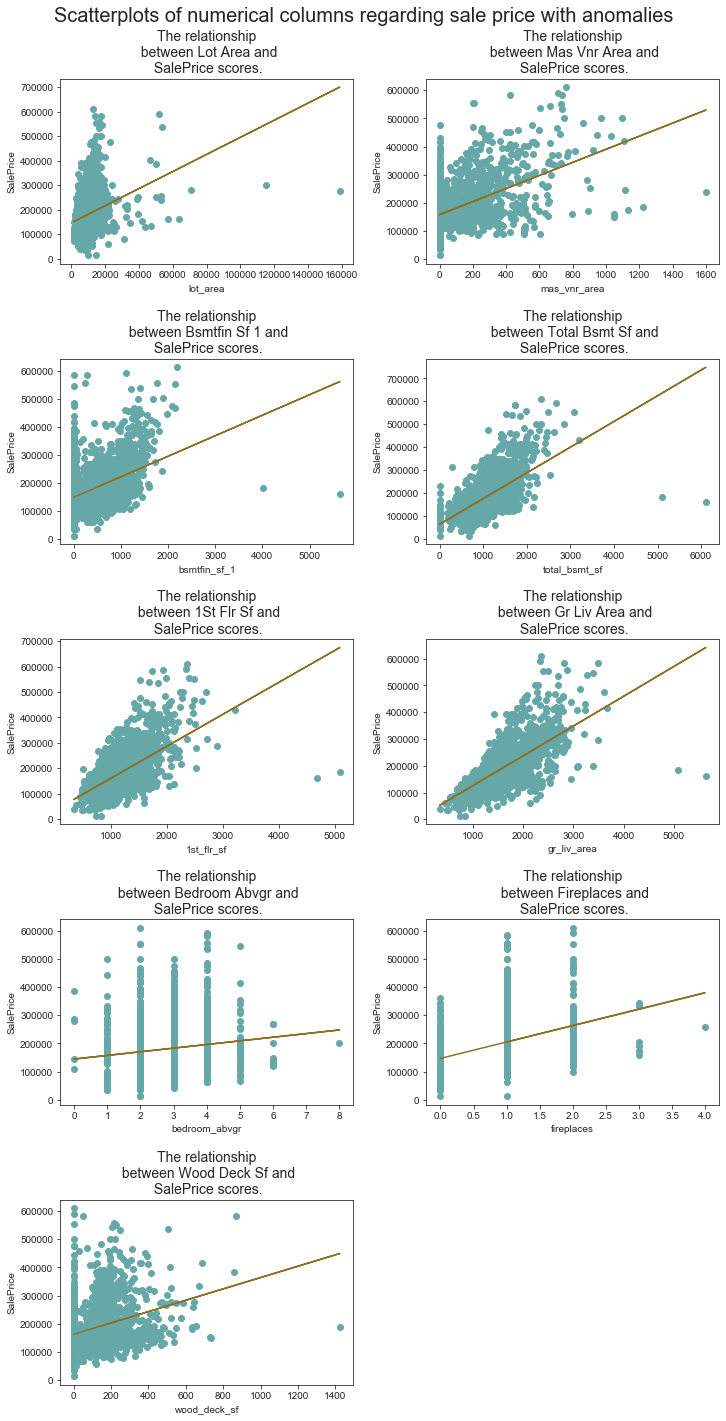

In [1884]:
# Looking at scatterplots WITH anomalies
subplot_scatter(df_train, ['lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 
                          '1st_flr_sf', 'gr_liv_area', 'bedroom_abvgr', 'fireplaces', 
                          'wood_deck_sf'],figsize=(10,20),
            maintitle='Scatterplots of numerical columns regarding sale price with anomalies')

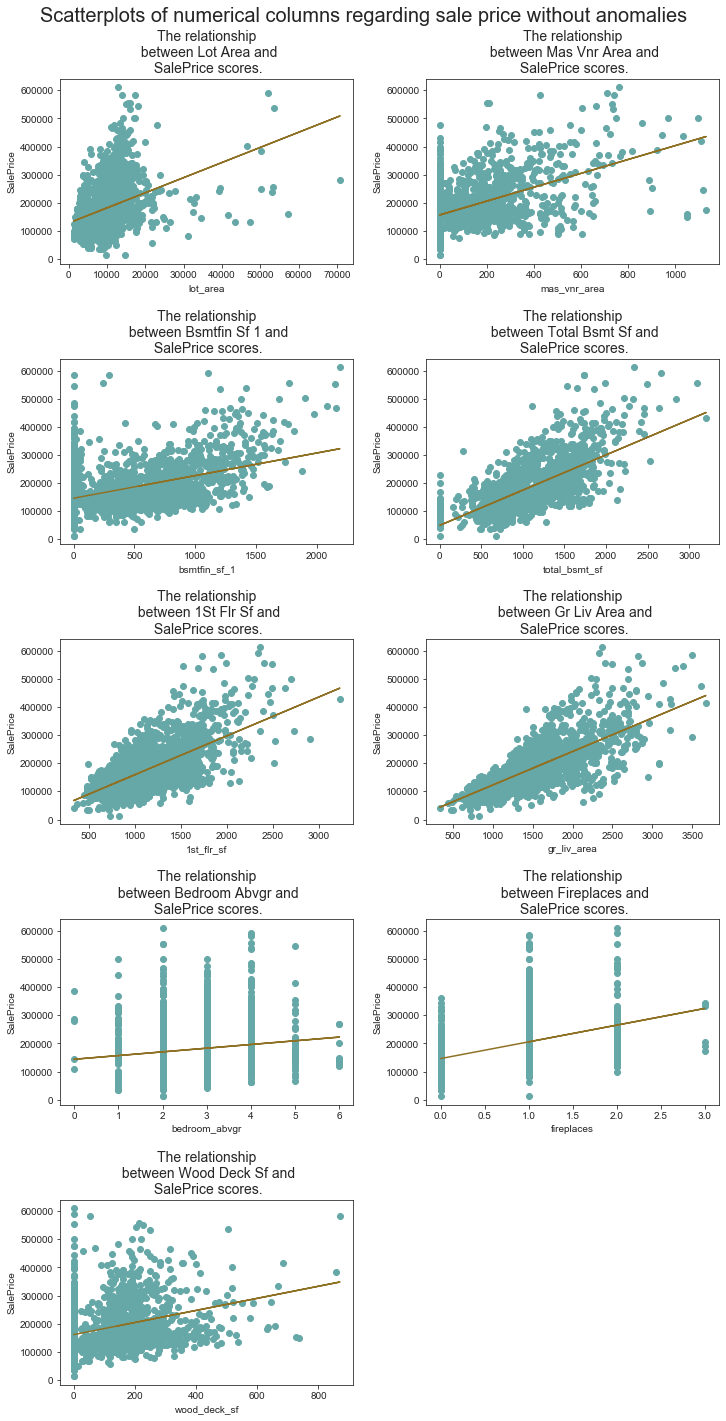

In [1885]:
# Looking at scatterplots WITHOUT anomalies
subplot_scatter(df_train_no_outliers,['lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 
                          '1st_flr_sf', 'gr_liv_area', 'bedroom_abvgr', 'fireplaces', 
                          'wood_deck_sf'],figsize=(10,20), 
            maintitle='Scatterplots of numerical columns regarding sale price without anomalies')

From the scatterplots, above we can see that chosen columns without anomalies are distributed more uniformly, will keep this version of dataframe. The relationship of the columns with saleprice we will explore later.

It is worth mentioning, that relationship columns 'bedroom_abvgr', 'fireplaces' with sale price will be better displayed by boxplot than scatterplot.

In [1886]:
# Keeping version of dataframe without anomalies
df_train = df_train_no_outliers.copy()
# Keeping categorical columns' names which represented by numbers for later research
categor_number = ['bedroom_abvgr','fireplaces','overall_qual','exter_qual',
                    'bsmt_qual','bsmt_exposure','bsmtfin_type_1','heating_qc',
                    'bsmt_full_bath','full_bath','half_bath','kitchen_qual',
                    'totrms_abvgrd','fireplace_qu','garage_cars','mo_sold',
                    'yr_sold','ms_subclass']
# Keeping numerical columns' names for later research
numerical_features = [name for name in ok_distr
                      if name not in categor_number]

Inspection of columns with categorical values represented by strings is explored next.

In [1887]:
# Dividing columns with unique categories for columns where relative frequencies of 
# the unique values are higher and less than the 0.7
not_ok_distr, ok_distr = unique_value_count(df_train,
                        df_train.select_dtypes(include='object').columns,limit=0.7)

RL         0.780344
RM         0.154300
FV         0.048649
C (all)    0.008845
RH         0.006388
A (agr)    0.000983
I (all)    0.000491
Name: ms_zoning, dtype: float64
-------------------------
Pave    0.99656
Grvl    0.00344
Name: street, dtype: float64
-------------------------
None    0.932187
Grvl    0.041769
Pave    0.026044
Name: alley, dtype: float64
-------------------------
Lvl    0.901229
HLS    0.041769
Bnk    0.037838
Low    0.019165
Name: land_contour, dtype: float64
-------------------------
Inside     0.734644
Corner     0.168550
CulDSac    0.063391
FR2        0.029484
FR3        0.003931
Name: lot_config, dtype: float64
-------------------------
Gtl    0.953317
Mod    0.042752
Sev    0.003931
Name: land_slope, dtype: float64
-------------------------
Norm      0.862408
Feedr     0.051597
Artery    0.034398
RRAn      0.017690
PosN      0.013268
RRAe      0.010319
PosA      0.005897
RRNn      0.002948
RRNe      0.001474
Name: condition_1, dtype: float64
--------------

It can be seen that 18 from 27 columns' values are distributed very unequally: ms_zoning, street, alley, land_contour, lot_config, land_slope, condition_1, condition_2, bldg_type, roof_style, roof_matl, bsmtfin_type_2, heating, electrical, functional, paved_drive, misc_feature, sale_type. These columns will no longer be considered.

In [1888]:
# Dropping 18 columns with high numbers of outliers and distributed highly unequally
df_train.drop(columns=not_ok_distr,inplace=True)
df_test.drop(columns=not_ok_distr,inplace=True)

#### Exploring Columns relationship

Next step is an exploration of remained categorical columns represented by numbers and strings with boxplots in relationship with target variable (Sale Price).

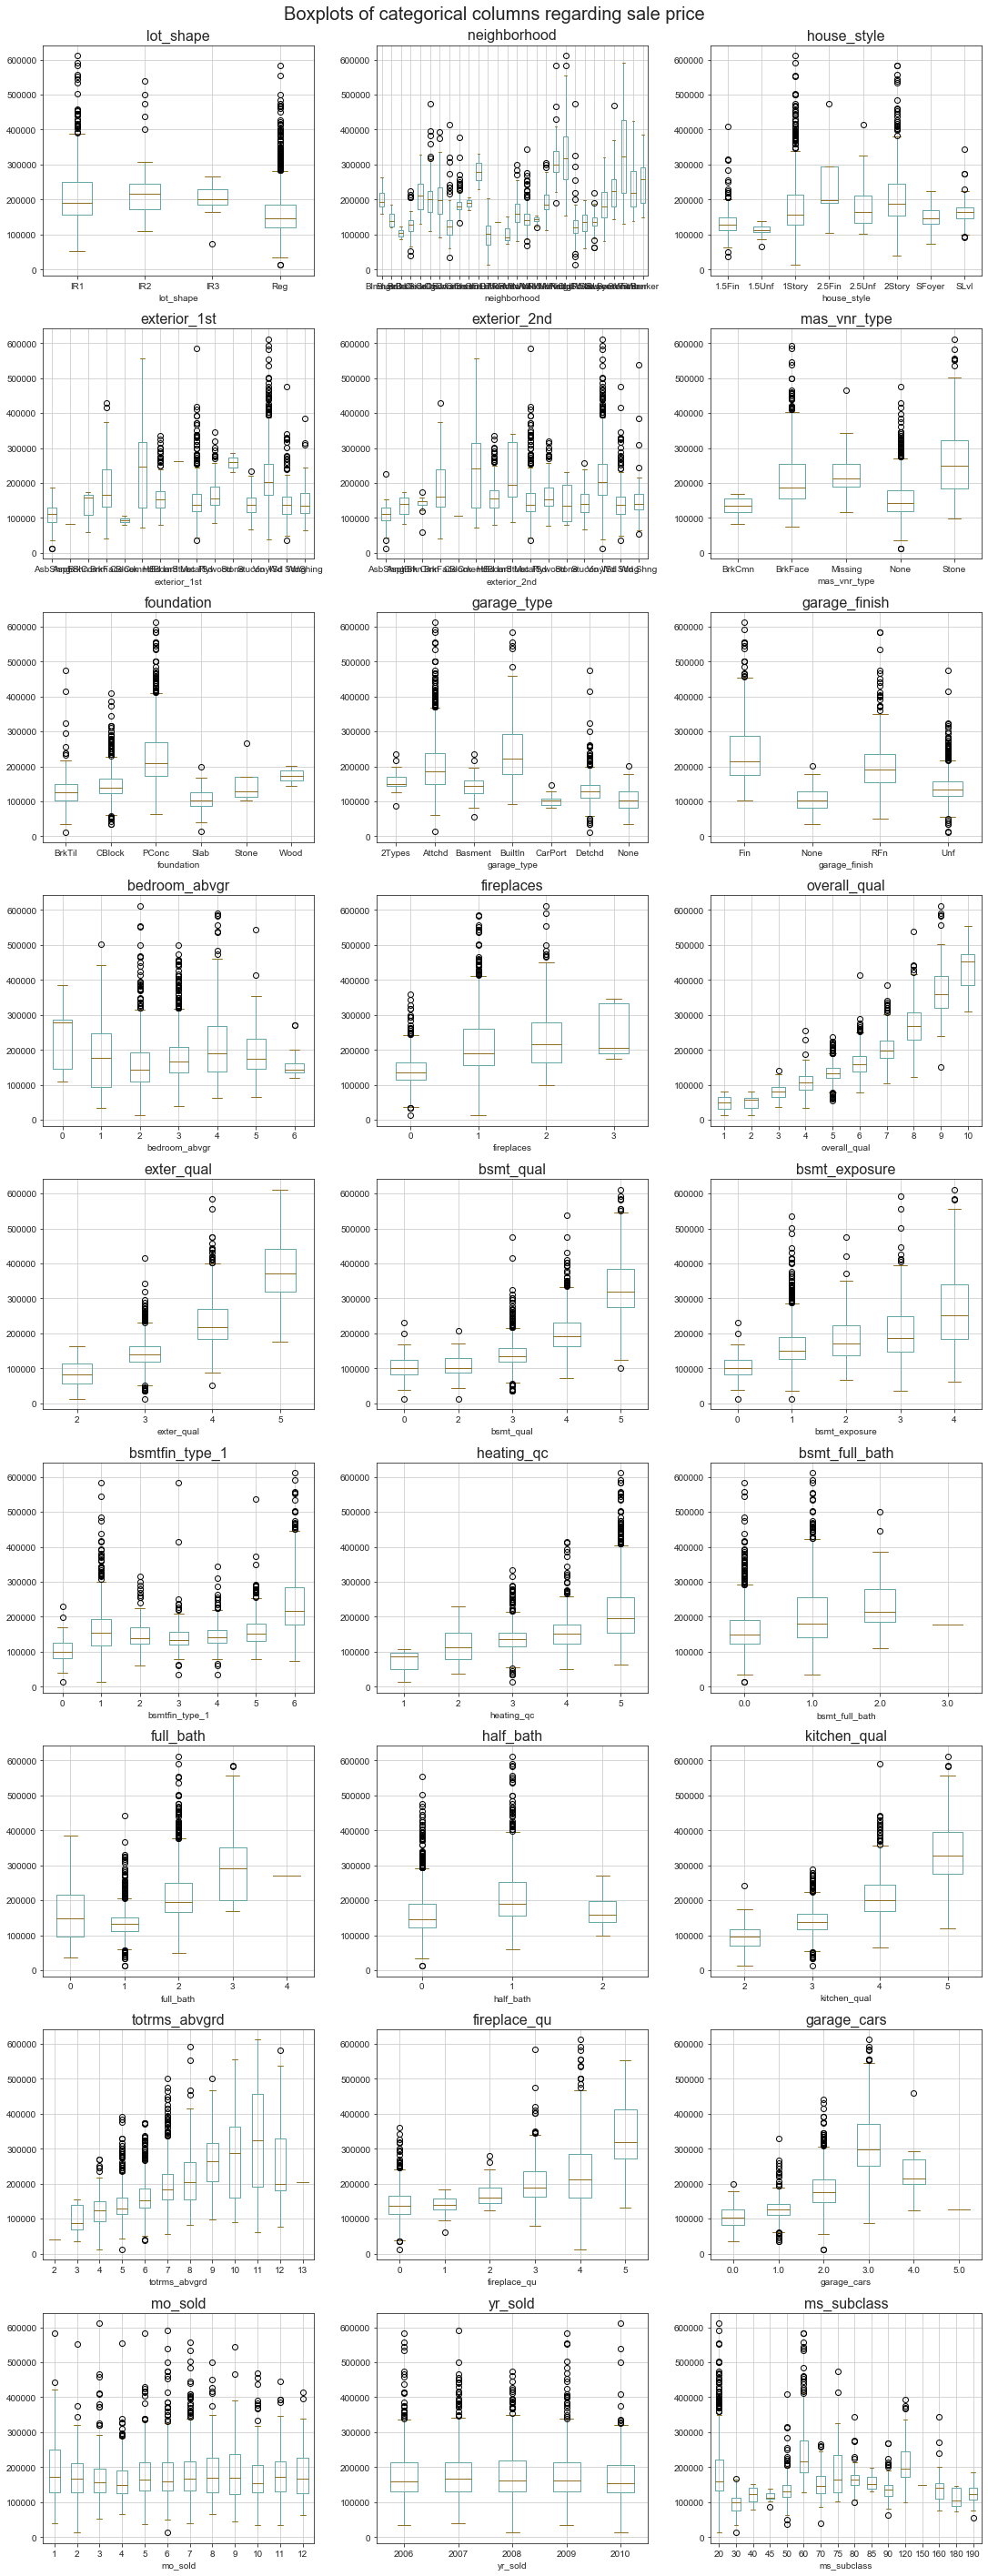

In [1889]:
# Adding the columns with categories represented by numbers
categor_columns = ok_distr+categor_number
# Creating boxplots saleprice per value of columns
nrows = int(np.ceil(len(categor_columns)/3))
fig, ax = plt.subplots(nrows=nrows,ncols=3, figsize=(15,40))
ax = ax.ravel()
for i, column in enumerate(categor_columns):
    df_train.boxplot(column='saleprice',by=column,ax=ax[i],
        color=dict(boxes='#65a8a7', whiskers='#65a8a7', medians='#8f7125', caps='#8f7125'))
    ax[i].set_title(column,fontsize=16)
fig.suptitle('')
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.3)
plt.suptitle('Boxplots of categorical columns regarding sale price',fontsize=20)
fig.subplots_adjust(top=0.965)
plt.show()

We can see from boxplots above that columns noticeably differ by categories regarding SalePrice:
    
 - with string categories: 'neighborhood','house_style','exterior_1st','exterior_2nd','mas_vnr_type','garage_type','garage_finish'.


 - with int categories:  
 'fireplaces','overall_qual','exter_qual','bsmt_qual','bsmt_exposure','heating_qc','full_bath',
'kitchen_qual','totrms_abvgrd','fireplace_qu'.

Columns which do not differ or showed minor difference regarding SalePrice:  

'lot_shape', 'foundation', 'bedroom_abvgr', 'bsmtfin_type_1', 'bsmt_full_bath', 'half_bath', 'garage_cars', 'mo_sold', 'yr_sold', 'ms_subclass'.


Calculating the correlation coefficients for each categorical and numerical column which represented by int or float.

In [1890]:
categor_numer_features = numerical_features + categor_number

df_correlation = df_train[categor_numer_features].corr()
column_corr = df_correlation[(df_correlation.saleprice > 0.5) | (df_correlation.saleprice < -0.5)]
correlate = column_corr['saleprice'].sort_values()
correlate

totrms_abvgrd     0.511936
garage_yr_blt     0.525042
mas_vnr_area      0.526765
full_bath         0.536892
fireplace_qu      0.538204
year_remod/add    0.549665
year_built        0.573751
bsmt_qual         0.618042
garage_cars       0.649431
1st_flr_sf        0.651645
garage_area       0.655907
total_bsmt_sf     0.668454
kitchen_qual      0.694898
exter_qual        0.717670
gr_liv_area       0.723066
overall_qual      0.804683
saleprice         1.000000
Name: saleprice, dtype: float64

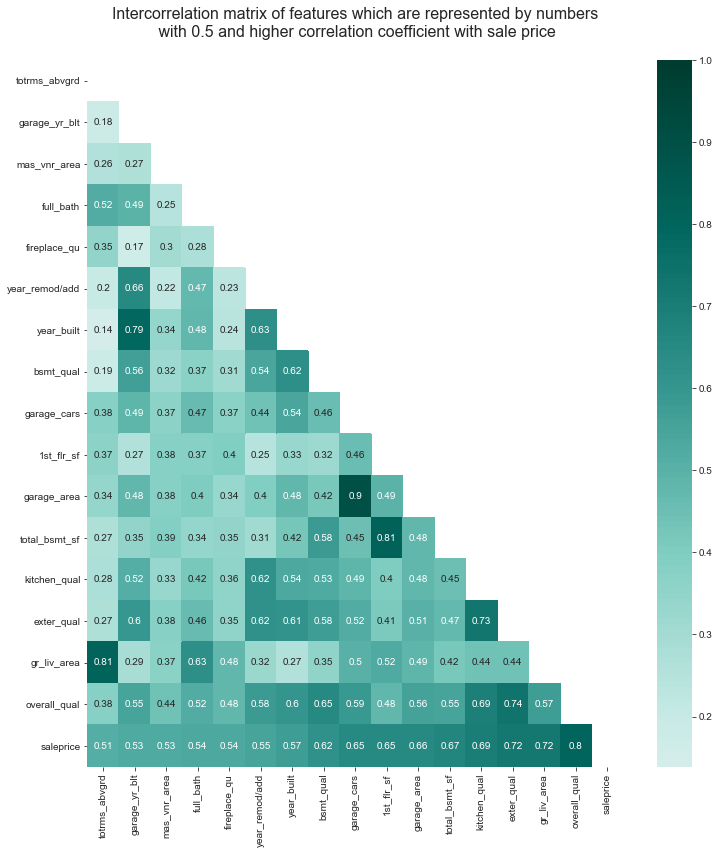

In [1891]:
# Creating a heatmap to visualize correlations
fig = plt.figure(figsize=(12,13))
# Set up mask to be "True" in the upper triangle.
corr = df_correlation.loc[correlate.index,correlate.index]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True,center=0,cmap="BrBG")
plt.title('Intercorrelation matrix of features which are\
 represented by numbers\n with 0.5 and higher correlation coefficient with sale price\n',
         fontsize=16);

From the heatmap absence of medium and strong negative correlation is noticeable. Sale price have strong correlation with features 'overall_qual' (0.8), 'gr_liv_area' (0.7), 'exter_qual' (0.72), 'kitchen_qual' (0.69), 'total_bsmt_sf' (0.67), 'garage_area' (0.65), '1st_flr_sf' (0.65), 'garage_cars' (0.65),  'bsmt_qual' (0.62), and some less than 0.6 : 'year_built', 'totrms_abvgrd', 'garage_yr_blt', 'mas_vnr_area', 'full_bath, 'fireplace_qu', 'year_remod/add'.

Some features such as 'garage_area' and 'garage_cars', 'year_built' and  'garage_yr_blt', 'total_bsmt_sf' and '1st_flr_sf' are highly correlated, but we will use lasso to sort it out.

Let's drop those numerical columns which have correlation coefficient with target variable less than 0.5 and those categorical columns which do not show sufficient difference of their distributions and medians regarding sale price.

In [1892]:
# Preparing columns' names for dropping
remained_features = list(correlate.index) + ['fireplaces','overall_qual','exter_qual','bsmt_qual',
                                       'bsmt_exposure','heating_qc','full_bath', 'kitchen_qual',
                                       'totrms_abvgrd','fireplace_qu','neighborhood','house_style',
                                       'exterior_1st','exterior_2nd','mas_vnr_type','garage_type',
                                       'garage_finish']
for_drop = set(df_train.columns) - set(remained_features)
print(f'{len(set(remained_features))} from {len(df_train.columns)} are \
remained, {len(for_drop)} will be dropped')

27 from 44 are remained, 17 will be dropped


In [1893]:
# Dropping columns with weak relationship with target variable
df_train.drop(columns=for_drop,inplace=True)
df_test.drop(columns=for_drop,inplace=True)

In [1894]:
# # keep
# # 0.694703
# df_train['garage_capacity'] = df_train['garage_cars'] * df_train['garage_area']
# # 0.711841
# df_train['bath_1st_flr_sf'] = df_train['full_bath'] * df_train['1st_flr_sf']
# # 0.794651
# df_train['bsmt_sf_qual'] = df_train['total_bsmt_sf'] * df_train['bsmt_qual']
# # 0.825541
# df_train['area_bsmt_garage_abvgrd'] = df_train['total_bsmt_sf'] * df_train['garage_area'] * df_train['totrms_abvgrd']

### Feature creating

In [1895]:
# Separation categorical features represented by strings
col_for_dummies = df_train.select_dtypes(include='object')

In [1896]:
# Separation categorical features represented by strings and numerical features
num_col = df_train.select_dtypes(include=np.number)
# Excluding target variable
features = [i for i in num_col.columns if i !='saleprice']

In [1897]:
# Preparing X and y for creating Polynomial Features
X_train = df_train[features]
y = df_train['saleprice']
X_test = df_test[features]

In [1898]:
# Creating Polynomial Features for both train and test
poly = PolynomialFeatures(include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [1899]:
# Converting to Data Frames
columns_name = poly.get_feature_names(features)
df_train_poly = pd.DataFrame(X_poly_train,columns=columns_name,index=X_train.index)
df_test_poly = pd.DataFrame(X_poly_test,columns=columns_name,index=X_test.index)

In [1900]:
# Creating dummies colums from categorical values represented by string for train and test
df_train_dummies = pd.get_dummies(data=df_train,columns=col_for_dummies.columns,drop_first=True)
df_test_dummies = pd.get_dummies(data=df_test,columns=col_for_dummies.columns,drop_first=True)

In [1901]:
# Checking difference between train and test data columns
unique_train_columns = set(df_train_dummies.columns) - set(df_test_dummies.columns)
unique_train_columns

{'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'mas_vnr_type_Missing',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'saleprice'}

In [1902]:
# Checking difference between test and train data columns
unique_test_columns = set(df_test_dummies.columns)-set(df_train_dummies.columns)
unique_test_columns

{'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'mas_vnr_type_CBlock'}

In [1903]:
# Deleting columns which differ in both dataframes
df_train_dummies.drop(columns=[i for i in unique_train_columns],inplace=True)
df_test_dummies.drop(columns=[i for i in unique_test_columns],inplace=True)

In [1904]:
# Joining polynomial features and dummies features in one dataset for train and test
X_train_result = pd.concat([df_train_poly,df_train_dummies],axis=1,join='outer')
X_test_result = pd.concat([df_test_poly,df_test_dummies],axis=1,join='outer')

### Premodeling

In [1905]:
# Standardizing train and test features
ss = StandardScaler()
X_train_scaler = ss.fit_transform(X_train_result) # for train used fit_transform
X_test_scaler = ss.transform(X_test_result) # for test transform only

In [1906]:
# Splitting train dataset for further verification of model
X_train, X_test, y_train, y_test = train_test_split(X_train_scaler,y)

### Modeling

Three type of modeling will be deploied: Multilinear regression, Lasso Linear Regression and Ridge Linear Regression.

#### Linear regression

In [1907]:
# Instantiate models
lr = LinearRegression()

In [1908]:
# Evaluation lr model with cross_val_score.
lr_scores = cross_val_score(lr,X_train,y_train)
# Checking R2 scores for train
print(lr_scores.mean())
lr_scores

0.8865645395672471


array([0.86795265, 0.86477066, 0.90756113, 0.90979691, 0.88274136])

In [1910]:
# Fitting whole train data
lr.fit(X_train_scaler,y)
# Evaluating R2 score for whole data
lr.score(X_train_scaler,y)
# R2 scores are consistent what can be interpret that the model is not overfit
# The scores is high enough to say that the model is not underfitting

0.9379541967547681

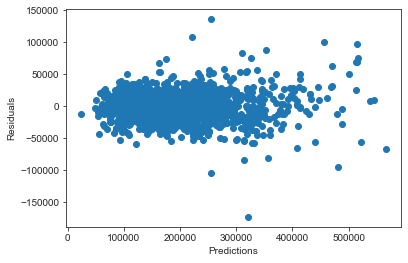

In [1803]:
# Creating a scatterplot to test for randomness of residuals
predictions = lr.predict(X_train_scaler)
residuals = y - predictions
plt.scatter(predictions,residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals');
# It can be seen that residuals distributed homoscedastic, but not really random due to outliers

#### Lasso

In [1912]:
# Choosing best alpha for lasso model
lasso_alpha = np.arange(60,100,1)
lasso_model = LassoCV(alphas=lasso_alpha,cv=5,tol=0.01)
lasso_model.fit(X_train,y_train)
opt_alpha_lasso = lasso_model.alpha_
opt_alpha_lasso

79

In [1914]:
# Modeling with best alpha
lasso_optimal = Lasso(alpha=opt_alpha_lasso,tol=0.01)
lasso_scores = cross_val_score(lasso_optimal,X_train,y_train)
# R2 for splitting data
lasso_scores.mean()

0.9085947987934919

In [1917]:
# Fitting model using full dataset
lasso_optimal.fit(X_train_scaler,y)
# Evaluating R2 score for full data
lasso_optimal.score(X_train_scaler,y)
# The r2 score is a bit less in comparison with lr (0.9379541967547681)
# R2 scores are consistent what can be interpret that the model is not overfit
# The scores is high enough to say that the model is not underfitting

0.927417956430073

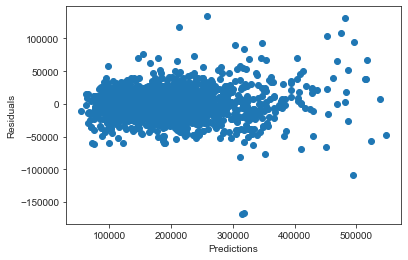

In [1919]:
# Creating a scatterplot to test for randomness of residuals
predictions = lasso_optimal.predict(X_train_scaler)
residuals = y - predictions
plt.scatter(predictions,residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals');
# It can be seen that residuals distributed homoscedastic, but not really random due to outliers

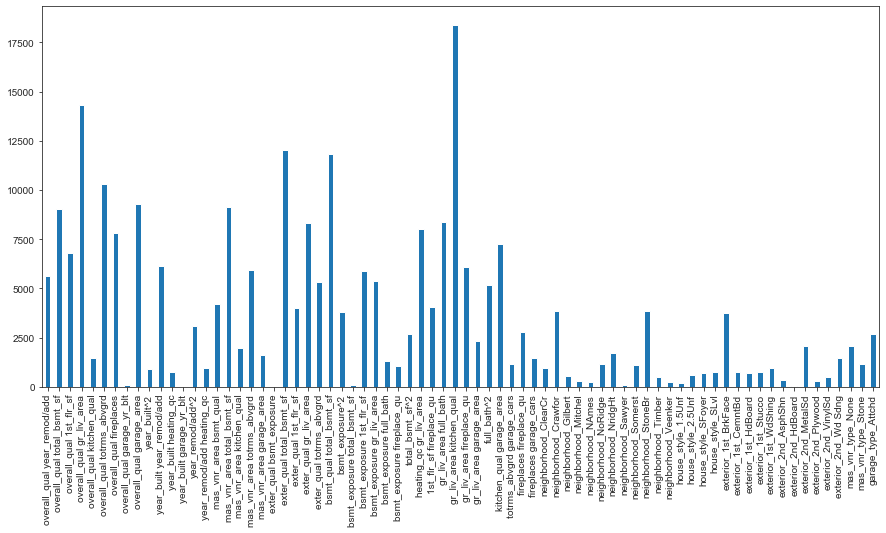

In [1811]:
# Joining coefficient and features and plot them to see which feature have influence on target
features_coeffitient = pd.Series(lasso_optimal_model.coef_,X_train_result.columns)
# If 0 - lasso eliminating these features
# Features for elimination
eliminame_features = features_coeffitient[features_coeffitient ==0]
# Feature with influence on the target variable
important_features = features_coeffitient[features_coeffitient >0]
# Plotting barchart for the influencing features
important_features.plot.bar(figsize=(15,7));

#### Ridge

In [1924]:
# Choosing best alpha for lasso model
r_alpha = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas = r_alpha,store_cv_values=True)
ridge_model.fit(X_train,y_train)
opt_alpha_ridge = ridge_model.alpha_
opt_alpha_ridge

48.241087041653714

In [1925]:
# Modeling with best alpha
ridge_optimal = Ridge(alpha=ridge_optimal_alpha)
ridge_scores = cross_val_score(ridge_optimal,X_train,y_train)
# R2 for splitting data
print(ridge_scores.mean())
ridge_scores

0.9107670440496743


array([0.87867972, 0.90287116, 0.9256117 , 0.92627313, 0.92039952])

In [1926]:
# Fitting model using full dataset
ridge_optimal.fit(X_train_scaler,y)
# Evaluating R2 score for full data
ridge_optimal.score(X_train_scaler,y)
# The r2 score is a bit less in comparison with lr (0.9379541967547681) 
# and almost the same with lasso (0.927417956430073)
# R2 scores are consistent what can be interpret that the model is not overfit
# The scores is high enough to say that the model is not underfitting

0.9276082213369446

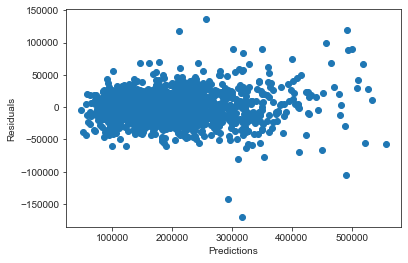

In [1927]:
# Creating a scatterplot to test for randomness of residuals
predictions = ridge.predict(X_train_scaler)
residuals = y - predictions
plt.scatter(predictions,residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals');
# It can be seen that residuals distributed homoscedastic, but not really random due to outliers

The decidion is to keep first model of Linear Regression due to best R2 score.

In [1824]:
predictions = lr.predict(X_test_scaler)

In [1825]:
ids = df_test.index
d = {'Id': ids, 'SalePrice': predictions}
result = pd.DataFrame(data=d)

In [1826]:
result.to_csv('./datasets/result_lr.csv',index=False)

## Best Kaggel score: 25888.84521